## import libraries ##

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

## load the dataset ##

In [29]:
df = pd.read_csv("auto_imports.csv")# As for understanding purpose we have updated the column names which is not there in given dataset
df.head()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Door-no,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression,Horsepower,Peak-rpm,City-mpg,Highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## to see last five rows of the dataset ##

In [32]:
df.tail()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Door-no,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression,Horsepower,Peak-rpm,City-mpg,Highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## To generate descriptive statistics of dataset ##

In [35]:
df.describe()

,Symboling,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Compression,City-mpg,Highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


## Lets check to see whether this dataset has any null values: ##

In [38]:
df.isnull().sum()

Symboling            0
Normalized-losses    0
Make                 0
Fuel-type            0
Aspiration           0
Door-no              0
Body-style           0
Drive-wheels         0
Engine-location      0
Wheel-base           0
Length               0
Width                0
Height               0
Curb-weight          0
Engine-type          0
No-cylinders         0
Engine-size          0
Fuel-system          0
Bore                 0
Stroke               0
Compression          0
Horsepower           0
Peak-rpm             0
City-mpg             0
Highway-mpg          0
price                0
dtype: int64

## To print a concise summary of a Dataframe ##

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized-losses  201 non-null    object 
 2   Make               201 non-null    object 
 3   Fuel-type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   Door-no            201 non-null    object 
 6   Body-style         201 non-null    object 
 7   Drive-wheels       201 non-null    object 
 8   Engine-location    201 non-null    object 
 9   Wheel-base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb-weight        201 non-null    int64  
 14  Engine-type        201 non-null    object 
 15  No-cylinders       201 non-null    object 
 16  Engine-size        201 non

## Distribution of the values of the price column: ##

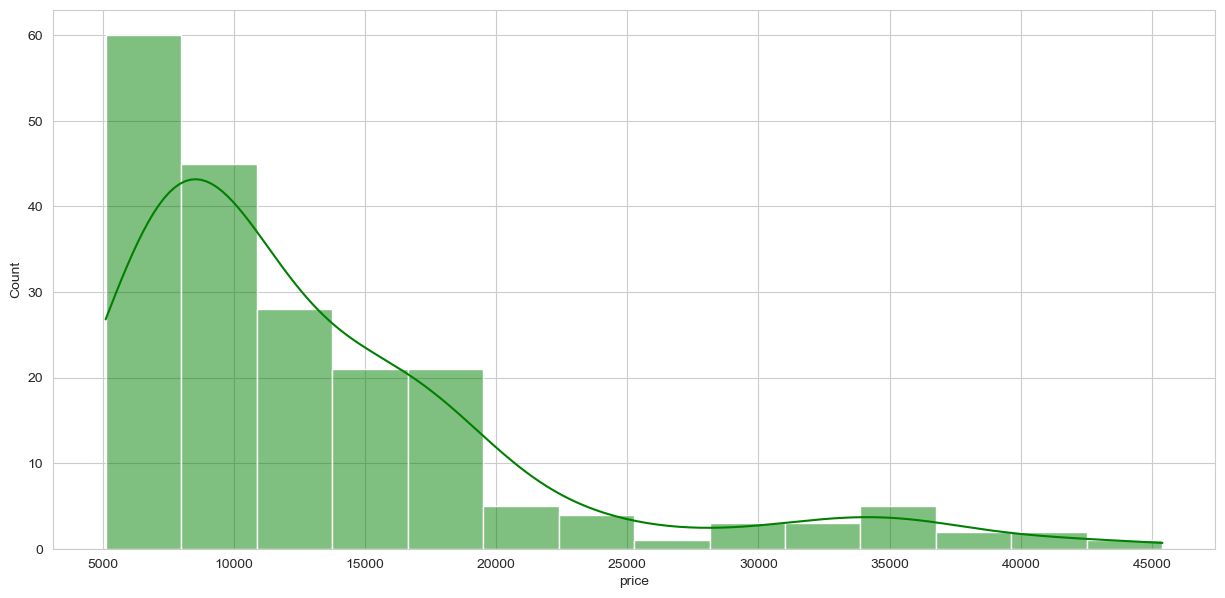

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.histplot(df.price, kde=True, color='green')
plt.show()

## correlation Matrics ##

In [47]:
import pandas as pd
import numpy as np

# Replace '?' or other non-numeric values with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric, coercing invalid parsing to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Now calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)


                   Symboling  Normalized-losses  Make  Fuel-type  Aspiration  \
Symboling           1.000000           0.528667   NaN        NaN         NaN   
Normalized-losses   0.528667           1.000000   NaN        NaN         NaN   
Make                     NaN                NaN   NaN        NaN         NaN   
Fuel-type                NaN                NaN   NaN        NaN         NaN   
Aspiration               NaN                NaN   NaN        NaN         NaN   
Door-no                  NaN                NaN   NaN        NaN         NaN   
Body-style               NaN                NaN   NaN        NaN         NaN   
Drive-wheels             NaN                NaN   NaN        NaN         NaN   
Engine-location          NaN                NaN   NaN        NaN         NaN   
Wheel-base         -0.535987          -0.074362   NaN        NaN         NaN   
Length             -0.365404           0.023220   NaN        NaN         NaN   
Width              -0.242423           0

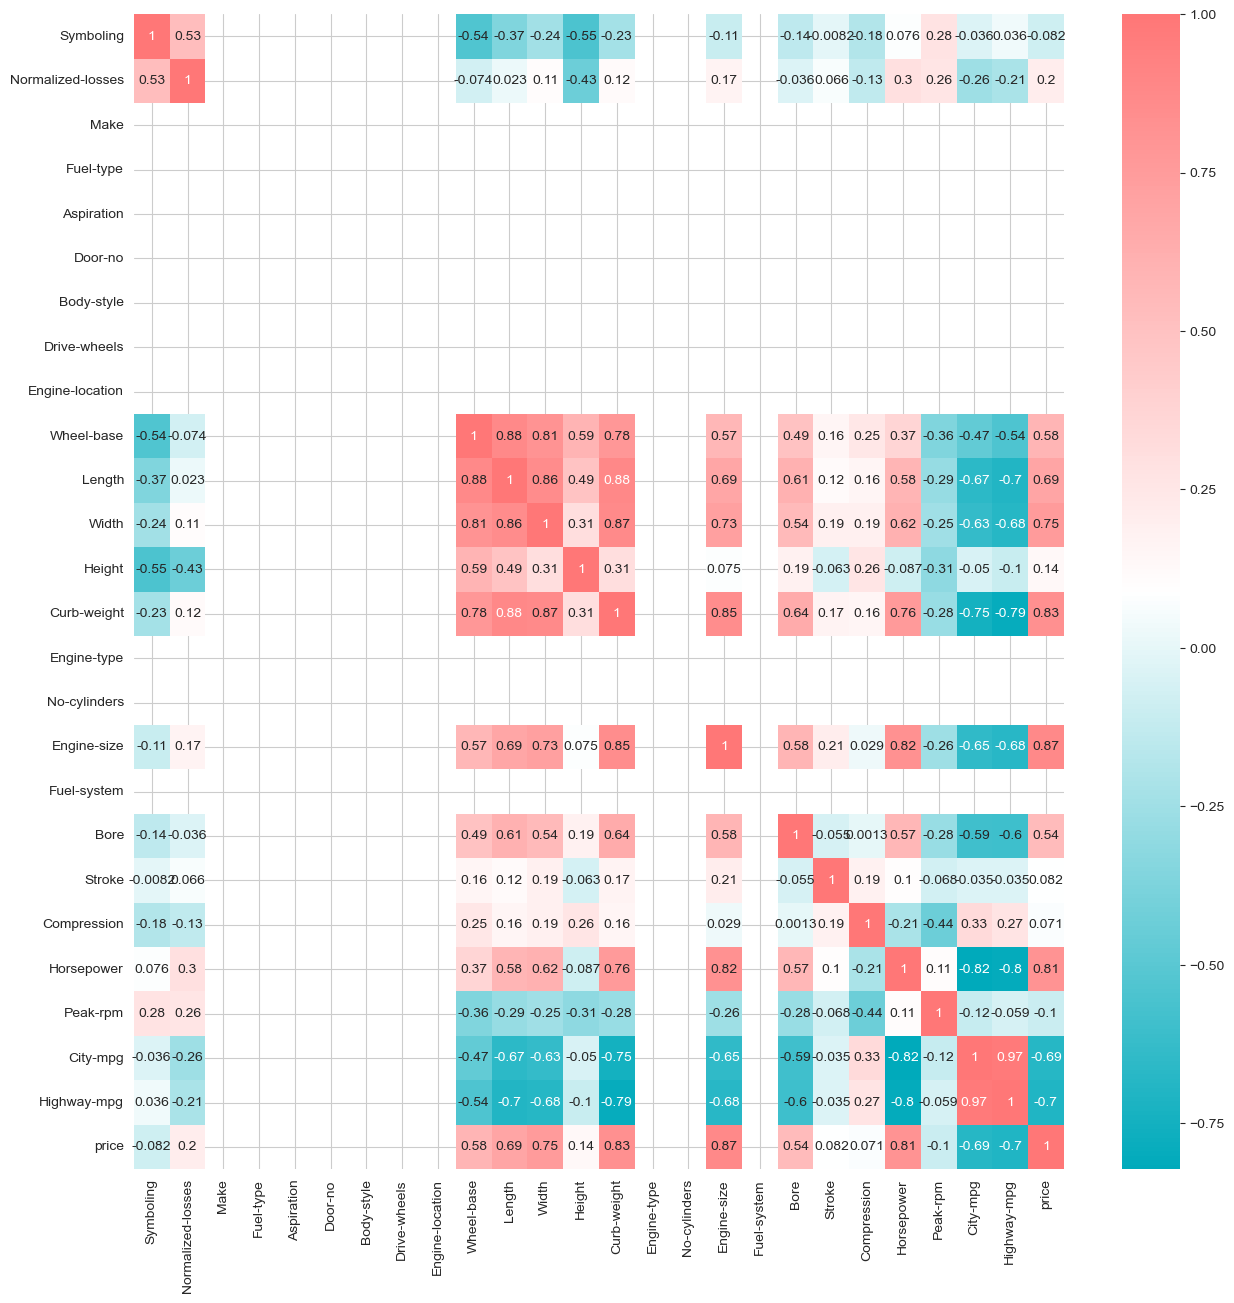

In [49]:
plt.figure(figsize = (15, 15))
corr = df.corr()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", ["#00aabb", "#ffffff","#ff7777"])
sns.heatmap(corr, cmap = cmap, annot = True)
plt.show()

## Splitting our data into training and testing ##

In [51]:
df = df[["Symboling","Wheel-base","Length","Width","Height","Curb-weight","Engine-size","Bore","Stroke","Compression","Horsepower","Peak-rpm","City-mpg","Highway-mpg","price"]]
x = np.array(df.drop('price',axis=1))
y = np.array(df['price'])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

## Scaling out data ##

In [55]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest  = scaler.transform(xtest)

## Training a Car Price Prediction Model ##

In [58]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

## Evaluate the model ##

In [61]:
print(f"Accuracy                       : {model.score(xtest,predictions) * 100}")
print(f"R Squared Error                : {round(metrics.r2_score(ytest, predictions) * 100, 2)}")
print(f"Mean Absolute Error            : {metrics.mean_absolute_error(ytest, predictions)}")
print(f"Mean Squared Error             : {metrics.mean_squared_error(ytest, predictions)}") 
print(f"Root Mean Square Error         : {np.sqrt(metrics.mean_squared_error(ytest, predictions))}")

Accuracy                       : 100.0
R Squared Error                : 71.64
Mean Absolute Error            : 1885.0
Mean Squared Error             : 11179972.853658536
Root Mean Square Error         : 3343.646640071067


## Plotting Actual and Predicted Price 

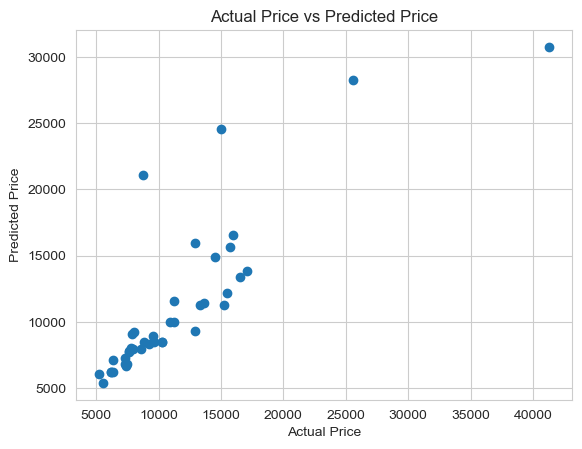

In [64]:
plt.scatter(ytest, predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

### Prediction - We have tried our model with some example data

In [82]:
def prediction(input_data):
    car_data = df.drop('price', axis = 1).iloc[input_data]
    car_scaler = scaler.transform(car_data.values.reshape(-1, 14))
    prediction = model.predict(car_scaler)
    print(f"Predicted Price of this car is : {prediction[0]}")
    print()

    real_price = df.iloc[input_data].price
    print(f"Real price of car is           : {real_price}")

prediction(4)

Predicted Price of this car is : 17450.0

Real price of car is           : 17450.0
